# Visualization : Cam EigenCam GradCam

In [1]:
from cams.visualizer import Visualizer
from utils.preprocess import preprocess
from utils.image import get_img_list_raf, img_to_input_tensor, pp_images, pp_blended_heatmaps

emotion_labels = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear']

## Parameters

In [2]:
MODEL_NAME = 'FERplus-impr-std_0124-1040_weights.h5'
LAST_CONV_NAME = 'block3_conv3'

IMG_SHAPE = (100,100,3)

emotion = 'Anger'
num_imgs = 10

## Input Images

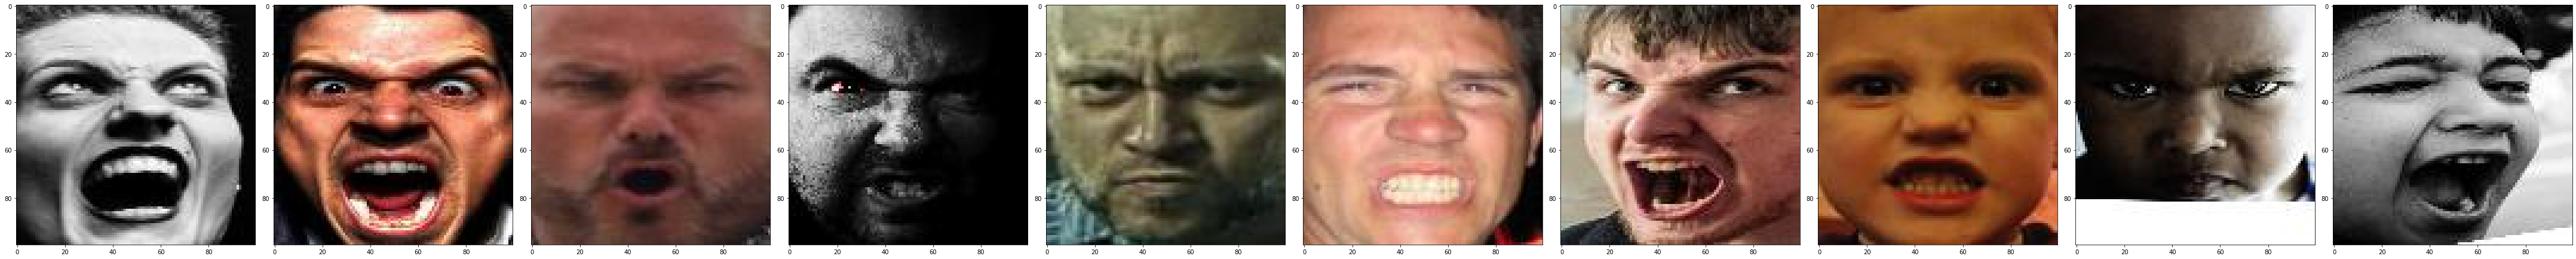

In [3]:
img_list = get_img_list_raf(emotion, num_imgs)
img_tensors = img_to_input_tensor(img_list, IMG_SHAPE)
img_tensors_not_rgb = img_to_input_tensor(img_list, IMG_SHAPE, RGB=False)
pp_images(img_tensors)

## Visualizer

In [4]:
vis = Visualizer(MODEL_NAME, LAST_CONV_NAME, IMG_SHAPE, preprocess)

Metal device set to: Apple M1


2022-01-27 11:56:21.635267: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-27 11:56:21.635368: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## get heatmaps : Cam, EigenCam, GradCam

In [5]:
heatmap_CAM, pred_CAM = vis.getCAM(img_tensors_not_rgb)
heatmap_EigenCam, pred_EigenCam = vis.getEigenCAM(img_tensors)
heatmap_GradCam, pred_GradCam = vis.getGradCAM(img_tensors)

2022-01-27 11:56:21.840232: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-27 11:56:21.898597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 11:56:22.071224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 11:56:22.395733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## Result

### blended

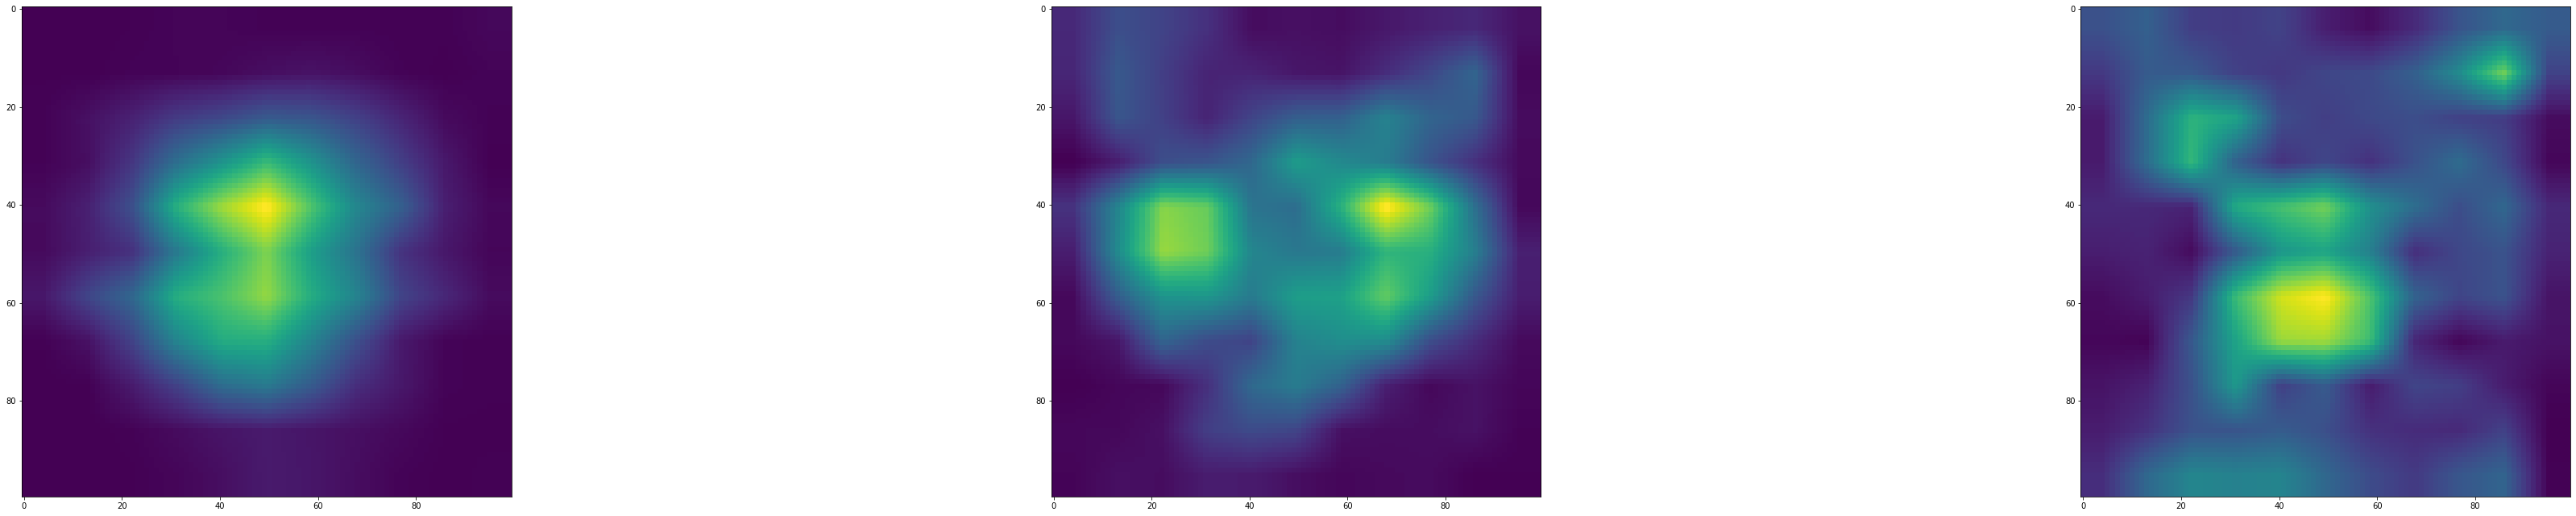

In [6]:
pp_blended_heatmaps([heatmap_CAM,heatmap_EigenCam,heatmap_GradCam])

### Cam

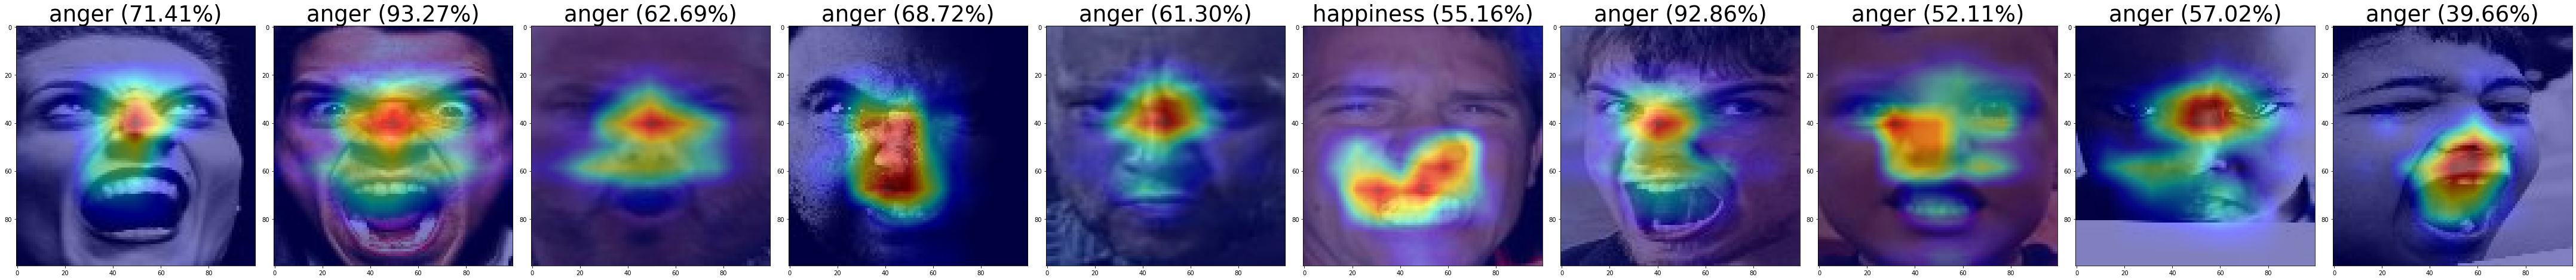

In [7]:
pp_images(img_tensors, heatmap_CAM, pred_CAM, emotion_labels)

### EigenCam

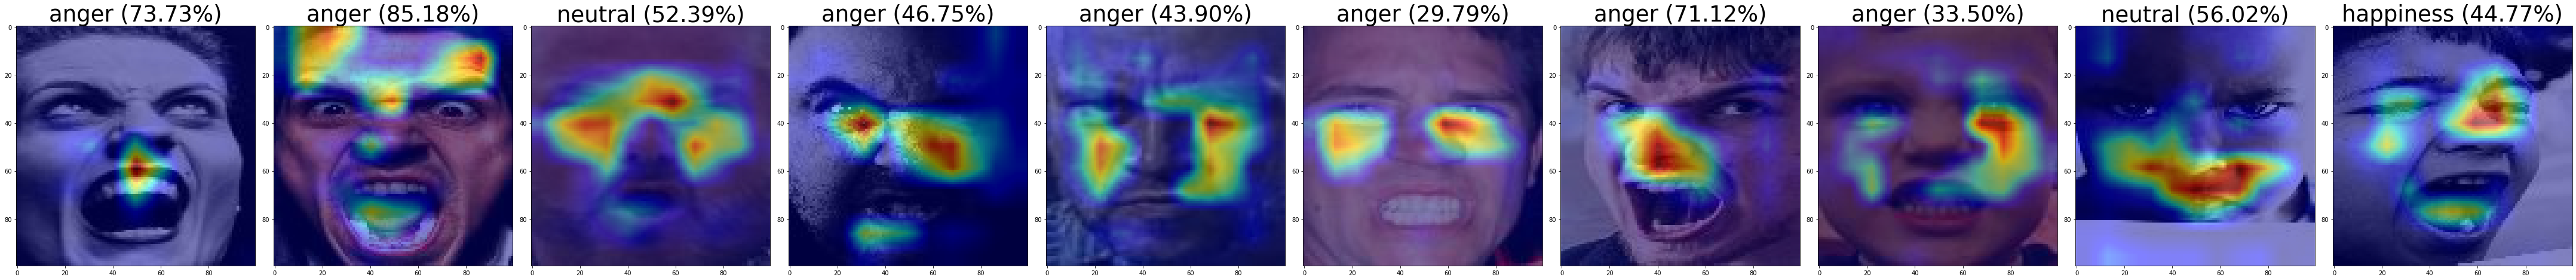

In [8]:
pp_images(img_tensors, heatmap_EigenCam, pred_EigenCam, emotion_labels)

### GradCam

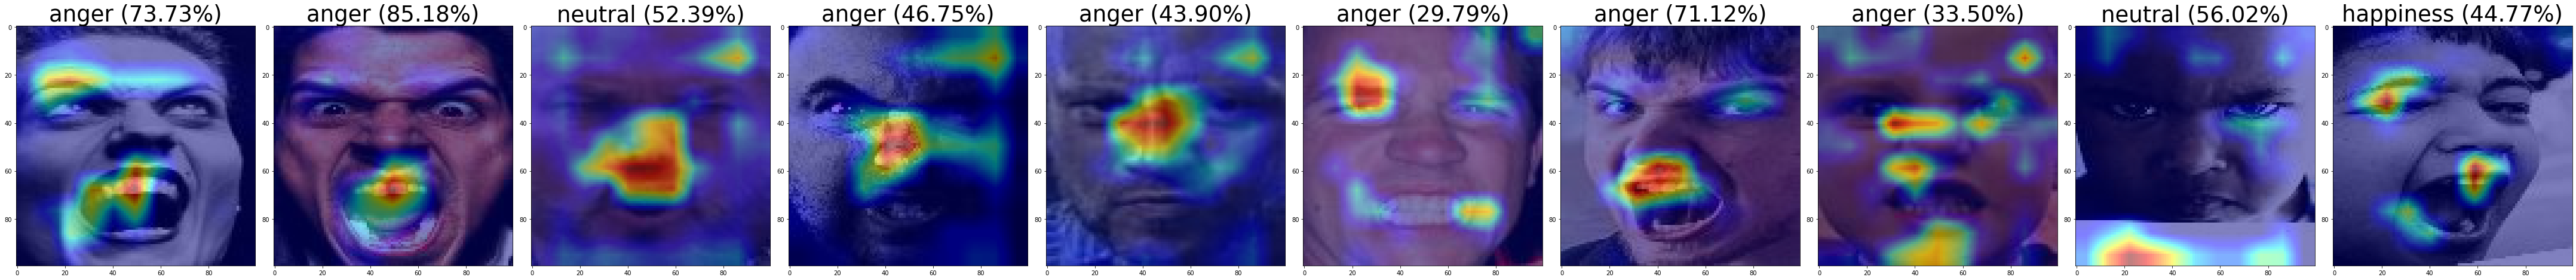

In [9]:
pp_images(img_tensors, heatmap_GradCam, pred_GradCam, emotion_labels)